In [ ]:

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


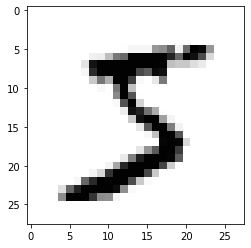

In [ ]:
import matplotlib.pyplot as plt
image_index =0 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [ ]:

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### **Model**

In [ ]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

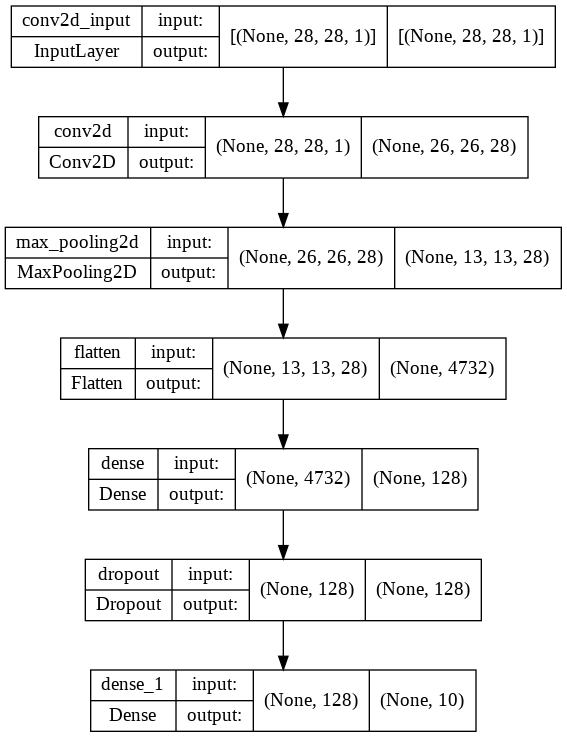

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **2 fold cross validation**

In [ ]:
from sklearn.model_selection import KFold

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
history_per_fold = []



In [ ]:

k = 2
kf = KFold(n_splits=k, random_state=None)
kf_x_train= 0
kf_y_train= 0
 
acc_score = []
fold=1
for train_index , val_index in kf.split(x_train):
    kf_x_train , kf_x_val = x_train[train_index], x_train[val_index]
    kf_y_train , kf_y_val = y_train[train_index] , y_train[val_index]

    print("\nTraining for fold: ",fold)
    history = model.fit( kf_x_train, kf_y_train, epochs=10, batch_size= 200, validation_data=(kf_x_val, kf_y_val))
    history_per_fold.append(history)

    print("\nEvaluating model: ")
    scores= model.evaluate(x_test, y_test)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])
    fold+=1


Training for fold:  1
Epoch 1/10
150/150 [==============================] - 12s 10ms/step - loss: 0.4395 - accuracy: 0.8697 - val_loss: 0.2170 - val_accuracy: 0.9360
Epoch 2/10
150/150 [==============================] - 1s 6ms/step - loss: 0.1908 - accuracy: 0.9435 - val_loss: 0.1479 - val_accuracy: 0.9560
Epoch 3/10
150/150 [==============================] - 1s 6ms/step - loss: 0.1330 - accuracy: 0.9610 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 4/10
150/150 [==============================] - 1s 6ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.0949 - val_accuracy: 0.9716
Epoch 5/10
150/150 [==============================] - 1s 6ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.0895 - val_accuracy: 0.9722
Epoch 6/10
150/150 [==============================] - 1s 6ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0772 - val_accuracy: 0.9769
Epoch 7/10
150/150 [==============================] - 1s 6ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0747 - va

In [ ]:
for i in range(len(scores)):
  print("Fold ",i+1," loss: ",loss_per_fold[i])
  print("Fold ",i+1," accuracy: ",acc_per_fold[i],"\n")

Fold  1  loss:  0.06070541962981224
Fold  1  accuracy:  0.9797000288963318 

Fold  2  loss:  0.05069149285554886
Fold  2  accuracy:  0.9865000247955322 



<Figure size 648x288 with 0 Axes>

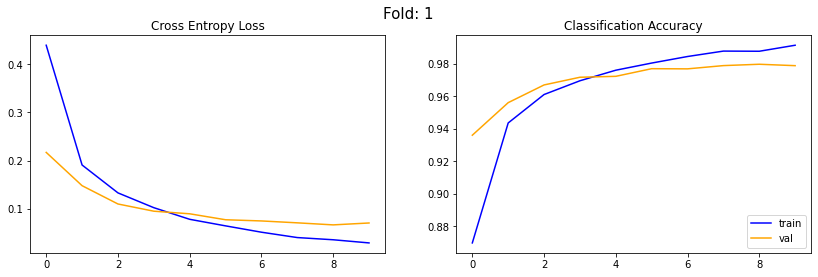

<Figure size 648x288 with 0 Axes>

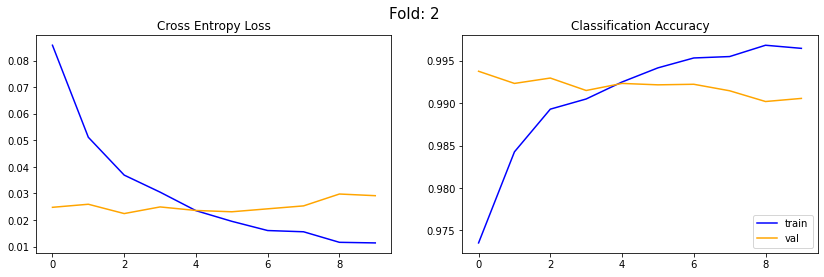

In [ ]:

for i in range(len(history_per_fold)):
  fig = plt.figure(figsize=(9,4))

  # Needed to add spacing between 1st and 2nd row
  # Add a margin between the main title and sub-plots
  fig.subplots_adjust(wspace=2, top=0.85)

  fig, ax = plt.subplots(1, 2, figsize=(14,4))
  #fig.tight_layout()
  # Add the main title
  title = "Fold: "+str(i+1)
  fig.suptitle(title, fontsize=15)

  # Add the subplots
  #ax1 = fig.add_subplot(1,2,1)
  ax[0].title.set_text("Cross Entropy Loss")
  ax[0].plot(history_per_fold[i].history['loss'], color='blue', label='train')
  ax[0].plot(history_per_fold[i].history['val_loss'], color='orange', label='val')
  

  #ax2 = fig.add_subplot(1,2,2)
  ax[1].title.set_text("Classification Accuracy")
  ax[1].plot(history_per_fold[i].history['accuracy'], color='blue', label='train')
  ax[1].plot(history_per_fold[i].history['val_accuracy'], color='orange', label='val')

  plt.legend(loc="lower right")
  plt.show()

### **Confusion matrix**

In [ ]:
#Predict image label
from tqdm import tqdm
import numpy as np


y_predict=[]
for i in tqdm(x_test, desc="Predicting images"):
  y_predict.append(model.predict(np.expand_dims(i, axis=0)))

Predicting images: 100%|██████████| 10000/10000 [06:32<00:00, 25.51it/s]


In [ ]:
y_true=list(y_test)
y_pred=[np.squeeze(np.argmax(i)) for i in y_predict]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


cm=confusion_matrix(y_true, y_pred)
class_report=classification_report(y_true, y_pred)
#print(cm)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



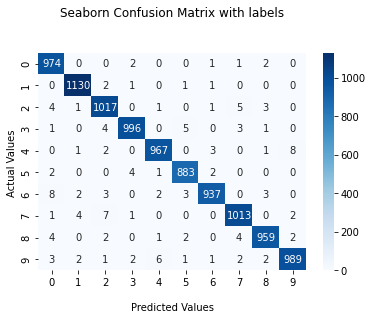

In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8','9'])

## Display the visualization of the Confusion Matrix.
plt.show()